In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from matplotlib import pyplot as plt
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import os
from google.colab import drive
from tensorflow.keras.utils import to_categorical
import imghdr

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# remover imagenes no validas
# data_dir = '/content/drive/MyDrive/gatos'
# image_exts = ['jpeg','jpg', 'bmp', 'png']
# for image_class in os.listdir(data_dir):
#     for image in os.listdir(os.path.join(data_dir, image_class)):
#         image_path = os.path.join(data_dir, image_class, image)
#         try:
#             img = cv2.imread(image_path)
#             tip = imghdr.what(image_path)
#             if tip not in image_exts:
#                 print('Image not in ext list {}'.format(image_path))
#                 os.remove(image_path)
#         except Exception as e:
#             print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [ ]:
# datos = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/gatos')

In [ ]:
# data_iterator = datos.as_numpy_iterator() # iterador numpy permite obtener lotes de datos como matrices numpy.
# batch = data_iterator.next()    #Extrae un lote de datos
# fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# for idx, img in enumerate(batch[0][:4]):
#     ax[idx].imshow(img.astype(int))
#     ax[idx].axis('off')
#     ax[idx].title.set_text(batch[1][idx]) # Establece el título
# #establece el título del subplot como la etiqueta correspondiente a la imagen. batch[1] contiene las etiquetas del lote de datos.
# plt.tight_layout()
# plt.show()

In [ ]:
# img.shape

In [ ]:
# crear archivo .npy de las imagenes
# datos_entrenamiento = []
# WIDTH = 100
# HEIGHT = 100
# # Debido a que 'datos' es un 'BatchDataset', necesitamos iterar sobre cada lote y cada imagen dentro de ese lote
# for batch in datos:
#     for img, label in zip(batch[0], batch[1]):
#         img_bn = tf.image.rgb_to_grayscale(img)  # Convertir a escala de grises
#         img_red = tf.image.resize(img_bn, [WIDTH, HEIGHT])  # Cambiar tamaño a 100x100
#         datos_entrenamiento.append((img_red.numpy(), label.numpy()))

In [ ]:
# temporal=datos_entrenamiento

In [ ]:
# guardar archivo
# np.save('imagenes_ent.npy', np.array(datos_entrenamiento, dtype=object), allow_pickle=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
b=np.load('/content/drive/MyDrive/imagenes_ent.npy', allow_pickle=True)

In [ ]:
b

array([[array([[[254.9745 ],
                [254.9745 ],
                [254.9745 ],
                ...,
                [254.9745 ],
                [254.9745 ],
                [254.9745 ]],

               [[254.9745 ],
                [254.9745 ],
                [254.9745 ],
                ...,
                [254.9745 ],
                [254.9745 ],
                [254.9745 ]],

               [[254.9745 ],
                [254.9745 ],
                [254.9745 ],
                ...,
                [254.9745 ],
                [254.9745 ],
                [254.9745 ]],

               ...,

               [[254.9745 ],
                [254.9745 ],
                [254.9745 ],
                ...,
                [254.9745 ],
                [254.9745 ],
                [254.9745 ]],

               [[247.44702],
                [244.55196],
                [246.38155],
                ...,
                [254.9745 ],
                [254.9745 ],
                [254.9745

In [ ]:
# len(datos_entrenamiento)

In [ ]:
X = [] #imagenes de entrada (pixeles)
y = [] #etiquetas (perro o gato)

for img, label in b:
  X.append(img)
  y.append([label])

In [ ]:
X = np.array(X).astype(float) / 255 #normalizar

In [ ]:
X.shape

(7319, 100, 100, 1)

In [ ]:
y

[[4],
 [0],
 [0],
 [5],
 [1],
 [1],
 [5],
 [6],
 [5],
 [0],
 [5],
 [3],
 [1],
 [3],
 [5],
 [1],
 [1],
 [3],
 [1],
 [3],
 [0],
 [3],
 [1],
 [6],
 [5],
 [1],
 [5],
 [4],
 [2],
 [2],
 [0],
 [4],
 [0],
 [5],
 [1],
 [6],
 [4],
 [2],
 [6],
 [6],
 [5],
 [6],
 [1],
 [5],
 [6],
 [6],
 [1],
 [1],
 [6],
 [0],
 [6],
 [5],
 [5],
 [0],
 [0],
 [6],
 [2],
 [1],
 [4],
 [5],
 [1],
 [6],
 [2],
 [2],
 [1],
 [6],
 [0],
 [1],
 [6],
 [5],
 [5],
 [4],
 [0],
 [4],
 [3],
 [6],
 [4],
 [2],
 [2],
 [5],
 [5],
 [6],
 [2],
 [5],
 [1],
 [5],
 [5],
 [5],
 [3],
 [6],
 [2],
 [3],
 [2],
 [5],
 [2],
 [6],
 [3],
 [6],
 [4],
 [0],
 [0],
 [0],
 [1],
 [1],
 [4],
 [1],
 [3],
 [6],
 [4],
 [0],
 [5],
 [2],
 [0],
 [1],
 [0],
 [0],
 [1],
 [4],
 [1],
 [6],
 [5],
 [6],
 [5],
 [0],
 [1],
 [0],
 [2],
 [6],
 [1],
 [6],
 [6],
 [4],
 [3],
 [1],
 [2],
 [1],
 [3],
 [3],
 [0],
 [4],
 [5],
 [0],
 [0],
 [0],
 [1],
 [2],
 [4],
 [3],
 [0],
 [5],
 [5],
 [0],
 [2],
 [4],
 [3],
 [2],
 [2],
 [4],
 [4],
 [1],
 [1],
 [0],
 [3],
 [6],
 [3],
 [2],
 [4]

In [ ]:
y = to_categorical(y, num_classes=7)

In [ ]:
y[0]

array([0., 0., 0., 0., 1., 0., 0.], dtype=float32)

 **Libreria correcta por que si no el .json no carga en javascript**

In [ ]:
!pip install tensorflowjs
!pip install TensorFlow==2.15.0
!pip install tensorflow-decision-forests==1.8.1

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of tensorstore to determine which version is compatible with other requirements. This could take a while.
  Using cached orbax_checkpoint-0.6.4-py3-none-any.whl.metadata (1.8 kB)
INFO: pip is still looking at multiple versions of tensorstore to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 98.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.0/124.0 kB 11.8 MB/s eta 0:00:00
 

In [ ]:
tf.keras.backend.clear_session()

Modelo de CNN para identificar las razas de gatos

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
WIDTH = 100
HEIGHT = 100
CLASES_GATOS = 7
inputs = keras.Input(shape=(WIDTH, HEIGHT, 1))

x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dense(WIDTH, activation="sigmoid")(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(CLASES_GATOS, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

Resumen de la arquitectura

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       73856 

Entrenar el modelo

In [ ]:
model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    # loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])


Crear train and test data set

In [ ]:
# Asignación de índices para el entrenamiento y la prueba basada en la proporción deseada
split_idx = int(len(X) * 0.90)  # 85% para entrenamiento y 15% para prueba
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

Aumento de datos

In [ ]:
#Realizar el aumento de datos con varias transformaciones. Al final, graficar 10 como ejemplo
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,  # Rotación máxima de 10 grados
    width_shift_range=0.3,  # Desplazamiento horizontal máximo del 30%
    zoom_range=0.5,  # Rango de zoom
    horizontal_flip=True,  # Permitir volteo horizontal
    fill_mode='nearest',  # Modo de llenado de píxeles faltantes
)
datagen.fit(X_train)

In [ ]:
X.shape

(7319, 100, 100, 1)

In [ ]:
X_train.shape

(6587, 100, 100, 1)

In [ ]:
y_train.shape

(6587, 7)

In [ ]:
datagen.fit(X_train)

In [ ]:
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
# class SaveBestModel(tf.keras.callbacks.Callback):
#     def __init__(self, save_best_metric='val_accuracy', this_max=False):
#         self.save_best_metric = save_best_metric
#         self.max = this_max
#         if this_max:
#             self.best = float('-inf')
#         else:
#             self.best = float('inf')

#     def on_epoch_end(self, epoch, logs=None):
#         metric_value = logs[self.save_best_metric]
#         if self.max:
#             if metric_value > self.best:
#                 self.best = metric_value
#                 self.best_weights = self.model.get_weights()

#         else:
#             if metric_value < self.best:
#                 self.best = metric_value
#                 self.best_weights= self.model.get_weights()

In [ ]:
# from tensorflow.keras.callbacks import TensorBoard

class SaveBestModel(tf.keras.callbacks.Callback):
    def __init__(self, save_best_metric='val_loss', this_max=False):
        self.save_best_metric = save_best_metric
        self.max = this_max
        if this_max:
            self.best = float('-inf')
        else:
            self.best = float('inf')

    def on_epoch_end(self, epoch, logs=None):
        if self.save_best_metric in logs:
            metric_value = logs[self.save_best_metric]
            if self.max:
                if metric_value > self.best:
                    self.best = metric_value
                    self.best_weights = self.model.get_weights()
            else:
                if metric_value < self.best:
                    self.best = metric_value
                    self.best_weights = self.model.get_weights()
        else:
            print(f"La métrica {self.save_best_metric} no está disponible en logs.")


In [ ]:
# #Usar la funcion flow del generador para crear un iterador que podamos enviar como entrenamiento a la funcion FIT del modelo
# data_gen_entrenamiento = datagen.flow(X_train, y_train, batch_size=32) #Creación de los Generadores de Datos
# # data_gen_entrenamiento = datagen.flow(X_train, y_train, batch_size=32).repeat()
# tensorboardAD = TensorBoard(log_dir='logs/cnn')

# save_best_model = SaveBestModel()
# print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# model.fit(
#     data_gen_entrenamiento,
#     epochs=10,
#     validation_data=(X_test, y_test),
#     steps_per_epoch=int(np.ceil(len(X_train) / float(128))),
#     validation_steps=int(np.ceil(len(X_test) / float(128))),
#     callbacks=[tensorboardAD, save_best_model])

In [ ]:
tensorboardAD = TensorBoard(log_dir='logs/cnn', write_graph=False)
save_best_model = SaveBestModel()

model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=100,
          callbacks=[tensorboardAD, save_best_model])

Epoch 1/20
206/206 [==============================] - 139s 664ms/step - loss: 1.5311 - accuracy: 0.4196 - val_loss: 1.2552 - val_accuracy: 0.5546
Epoch 2/20
206/206 [==============================] - 119s 577ms/step - loss: 1.1978 - accuracy: 0.5688 - val_loss: 1.1854 - val_accuracy: 0.5874
Epoch 3/20
206/206 [==============================] - 121s 586ms/step - loss: 0.9742 - accuracy: 0.6607 - val_loss: 1.0985 - val_accuracy: 0.6107
Epoch 4/20
206/206 [==============================] - 119s 575ms/step - loss: 0.7645 - accuracy: 0.7457 - val_loss: 0.9072 - val_accuracy: 0.6844
Epoch 5/20
206/206 [==============================] - 121s 586ms/step - loss: 0.5737 - accuracy: 0.8140 - val_loss: 0.8317 - val_accuracy: 0.7131
Epoch 6/20
206/206 [==============================] - 119s 578ms/step - loss: 0.3905 - accuracy: 0.8852 - val_loss: 0.8352 - val_accuracy: 0.7186
Epoch 7/20
206/206 [==============================] - 122s 592ms/step - loss: 0.2706 - accuracy: 0.9312 - val_loss: 0.8977 -

In [ ]:
model.set_weights(save_best_model.best_weights)
model.save_weights('best_weights.weights.h5')


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
CLASES_GATOS = 7
inputs = keras.Input(shape=(WIDTH, HEIGHT, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dense(WIDTH, activation="sigmoid")(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(CLASES_GATOS, activation="softmax")(x)
model2 = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model2.load_weights('best_weights.weights.h5')

In [ ]:
loss, acc = model.evaluate(X_test, y_test, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))


23/23 - 3s - loss: 0.8317 - accuracy: 0.7131 - 3s/epoch - 121ms/step
Restored model, accuracy: 71.31%


Probar el modelo con algunos gatos

In [ ]:
idx = np.random.randint(0, y_test.shape[0])

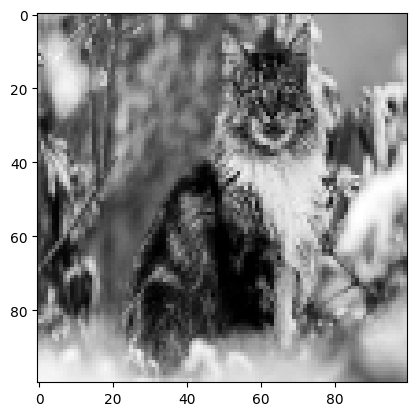

In [ ]:
plt.imshow(X_test[idx], cmap='gray')
plt.show()

In [ ]:
y_pred = np.argmax(model.predict([X_test[idx:idx + 1]]))
y_real = np.argmax(y_test[idx])

1/1 [==============================] - 0s 78ms/step


In [ ]:
print('Real:', y_real, 'Pred:', y_pred )

Real: 4 Pred: 4


In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 50990), started 2:18:02 ago. (Use '!kill 50990' to kill it.)

<IPython.core.display.Javascript object>

In [ ]:
model.save('CLSF_GATOS.h5')

In [ ]:
!pip install tensorflowjs

In [ ]:
!mkdir CLSFgatos

mkdir: cannot create directory ‘CLSFgatos’: File exists


In [ ]:
!tensorflowjs_converter --input_format keras CLSF_GATOS.h5 CLSFgatos

2024-09-29 00:05:52.474586: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-29 00:05:52.474663: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-29 00:05:52.479396: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-29 00:05:54.100506: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
